# K Means Clustering -- Image Quantization

In [66]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [67]:
image_as_array = mpimg.imread('ds3.jpg')

The image and it's shape

In [68]:
image_as_array.shape

(215, 460, 3)

In [69]:
image_as_array # RGB CODES FOR EACH PIXE

array([[[31, 29,  4],
        [31, 29,  4],
        [29, 27,  2],
        ...,
        [29, 32,  3],
        [29, 32,  3],
        [29, 32,  3]],

       [[29, 29,  3],
        [29, 29,  3],
        [28, 28,  2],
        ...,
        [30, 33,  4],
        [30, 33,  4],
        [30, 33,  4]],

       [[27, 27,  1],
        [28, 28,  2],
        [29, 29,  3],
        ...,
        [31, 34,  5],
        [31, 34,  5],
        [31, 34,  5]],

       ...,

       [[43, 40,  7],
        [42, 39,  6],
        [42, 39,  6],
        ...,
        [23, 27,  2],
        [24, 28,  3],
        [24, 28,  3]],

       [[41, 41,  7],
        [38, 38,  4],
        [36, 36,  2],
        ...,
        [21, 25,  2],
        [22, 26,  3],
        [22, 26,  3]],

       [[42, 41, 10],
        [36, 35,  4],
        [32, 31,  0],
        ...,
        [21, 25,  2],
        [21, 25,  2],
        [21, 25,  2]]], dtype=uint8)

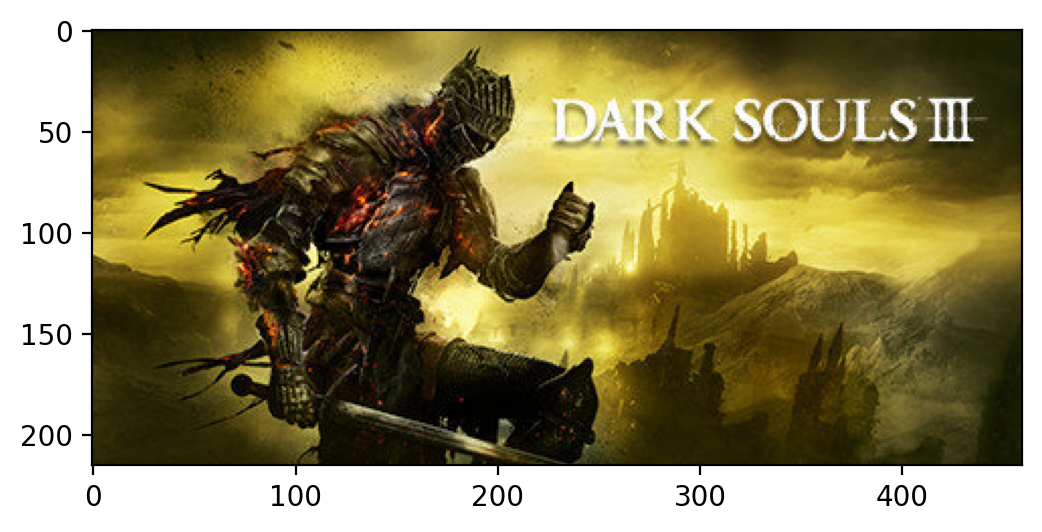

In [82]:
plt.figure(dpi=200)
plt.imshow(image_as_array)

Using K means clustering to quantize colors

In [71]:
(h,w,c) = image_as_array.shape
image_as_array2d = image_as_array.reshape(h*w,c)

In [72]:
from sklearn.cluster import KMeans

In [73]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(image_as_array2d)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

In [74]:
ssd

[329006535.0117554,
 179195315.11053726,
 121606951.65721022,
 90357755.41931824,
 70742600.14275251,
 57866076.05841902,
 47434566.046880305,
 41429157.07609212]

Text(0, 0.5, ' Sum of Squared Distances')

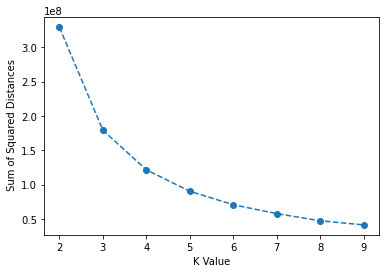

In [75]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [76]:
bestn = pd.Series(ssd).diff().argmax()

In [77]:
final_model = KMeans(n_clusters=bestn)
final_model

KMeans(n_clusters=7)

In [78]:
labels = model.fit_predict(image_as_array2d)
rgb_codes = model.cluster_centers_.round(0).astype(int)
rgb_codes

array([[ 45,  38,   8],
       [218, 200,  79],
       [147, 124,  42],
       [248, 246, 238],
       [184, 161,  55],
       [110,  92,  32],
       [ 15,  12,   5],
       [234, 223, 130],
       [ 77,  63,  18]])

In [79]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))
quantized_image

array([[[45, 38,  8],
        [45, 38,  8],
        [45, 38,  8],
        ...,
        [45, 38,  8],
        [45, 38,  8],
        [45, 38,  8]],

       [[45, 38,  8],
        [45, 38,  8],
        [45, 38,  8],
        ...,
        [45, 38,  8],
        [45, 38,  8],
        [45, 38,  8]],

       [[15, 12,  5],
        [45, 38,  8],
        [45, 38,  8],
        ...,
        [45, 38,  8],
        [45, 38,  8],
        [45, 38,  8]],

       ...,

       [[45, 38,  8],
        [45, 38,  8],
        [45, 38,  8],
        ...,
        [15, 12,  5],
        [15, 12,  5],
        [15, 12,  5]],

       [[45, 38,  8],
        [45, 38,  8],
        [45, 38,  8],
        ...,
        [15, 12,  5],
        [15, 12,  5],
        [15, 12,  5]],

       [[45, 38,  8],
        [45, 38,  8],
        [45, 38,  8],
        ...,
        [15, 12,  5],
        [15, 12,  5],
        [15, 12,  5]]])

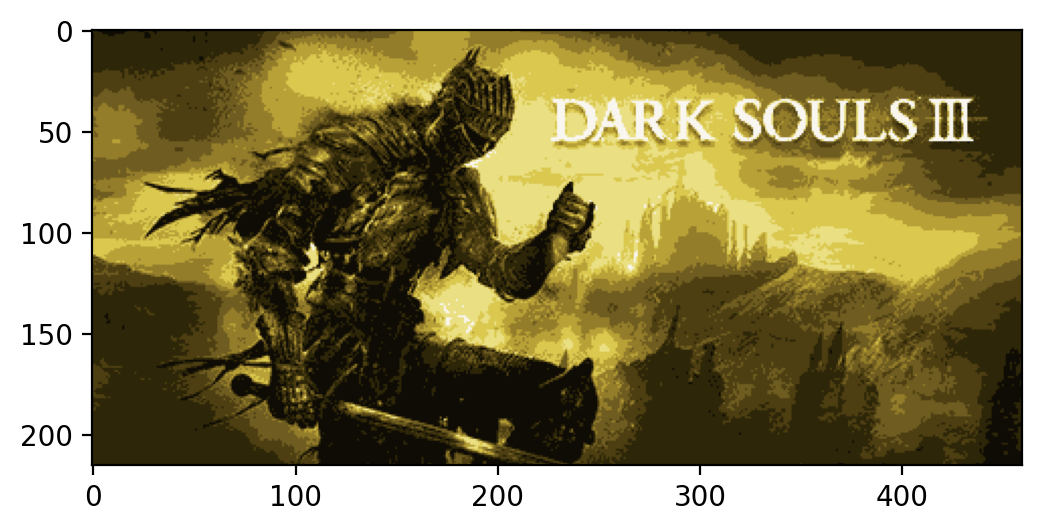

In [81]:
plt.figure(dpi=200)
plt.imshow(quantized_image)